In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
# add path os scripts
import sys
sys.path.append("../src")
from preprocess_lob import filter_and_prepare_lob_data
from load_data import load_lob_data
df = pd.read_parquet("/home/projects/futures-market-analysis/data/processed_matched_data/NQH24_matched_lob_hedge.parquet")
ric = 'NQH24'
#load hedge data
df_o = load_lob_data("../data", specific_ric=ric)
df_o_cleaned = filter_and_prepare_lob_data(df_o,specific_ric=ric)
df.columns


Index(['#RIC', 'Alias Underlying RIC', 'Domain', 'lob_time', 'GMT Offset',
       'Type', 'L1-BidPrice', 'L1-BidSize', 'L1-AskPrice', 'L1-AskSize',
       'L2-BidPrice', 'L2-BidSize', 'L2-AskPrice', 'L2-AskSize', 'L3-BidPrice',
       'L3-BidSize', 'L3-AskPrice', 'L3-AskSize', 'L4-BidPrice', 'L4-BidSize',
       'L4-AskPrice', 'L4-AskSize', 'L5-BidPrice', 'L5-BidSize', 'L5-AskPrice',
       'L5-AskSize', 'L6-BidPrice', 'L6-BidSize', 'L6-AskPrice', 'L6-AskSize',
       'L7-BidPrice', 'L7-BidSize', 'L7-AskPrice', 'L7-AskSize', 'L8-BidPrice',
       'L8-BidSize', 'L8-AskPrice', 'L8-AskSize', 'L9-BidPrice', 'L9-BidSize',
       'L9-AskPrice', 'L9-AskSize', 'L10-BidPrice', 'L10-BidSize',
       'L10-AskPrice', 'L10-AskSize', 'original_lob_index',
       'matched_hedge_clordid', 'matched_hedge_exec_price',
       'matched_hedge_side', 'matched_hedge_exectype', 'matched_hedge_time',
       'matched_hedge_this_fill_size', 'matched_lob_level_interacted',
       'match_type', 'matched_lob_price_

In [3]:
df.describe()

,lob_time,GMT Offset,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L10-AskPrice,L10-AskSize,original_lob_index,matched_hedge_exec_price,matched_hedge_side,matched_hedge_exectype,matched_hedge_time,matched_hedge_this_fill_size,matched_lob_level_interacted,matched_lob_price_at_level
count,41741,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,...,41741.000000,41741.000000,4.174100e+04,41741.000000,41741.000000,41741.000000,41741,41741.000000,41741.000000,5900.000000
mean,2024-02-08 13:28:03.741573632,-5.951798,17578.128704,3.151146,17578.580976,3.273760,17577.875494,5.839151,17578.833964,6.005103,...,17580.838294,9.840732,2.405913e+06,17578.367283,1.498239,1.972162,2024-02-08 13:28:02.831625216,1.081694,0.014542,17583.430890
min,2024-01-02 00:43:09.703744200,-6.000000,16384.500000,1.000000,16385.000000,1.000000,16384.250000,1.000000,16385.250000,1.000000,...,16387.250000,1.000000,8.550000e+02,16384.500000,1.000000,1.000000,2024-01-02 00:43:09.718000,1.000000,-10.000000,16394.750000
25%,2024-01-19 19:15:07.703652864,-6.000000,17286.750000,1.000000,17287.000000,1.000000,17286.500000,4.000000,17287.250000,4.000000,...,17289.250000,7.000000,1.228404e+06,17287.000000,1.000000,2.000000,2024-01-19 19:15:06.822000128,1.000000,-1.000000,17285.500000
50%,2024-02-07 14:14:00.508965120,-6.000000,17682.750000,2.000000,17683.250000,2.000000,17682.500000,5.000000,17683.500000,6.000000,...,17685.500000,9.000000,2.367361e+06,17683.000000,1.000000,2.000000,2024-02-07 14:14:00.211000064,1.000000,1.000000,17701.750000
75%,2024-02-28 19:43:47.384468736,-6.000000,17976.250000,4.000000,17977.000000,4.000000,17976.000000,7.000000,17977.250000,7.000000,...,17979.250000,12.000000,3.696353e+06,17976.500000,2.000000,2.000000,2024-02-28 19:43:47.155000064,1.000000,1.000000,17970.812500
max,2024-03-14 15:49:54.813856706,-5.000000,18407.250000,107.000000,18407.750000,170.000000,18407.000000,104.000000,18408.000000,189.000000,...,18410.000000,224.000000,4.658526e+06,18407.000000,2.000000,2.000000,2024-03-14 15:49:52.306000,19.000000,10.000000,18407.000000
std,NaN,0.214195,497.099247,2.785175,497.124423,3.191173,497.098811,3.420302,497.125369,3.822311,...,497.126656,5.829590,1.368356e+06,497.119173,0.500003,0.164511,NaN,0.484830,1.670255,500.342496


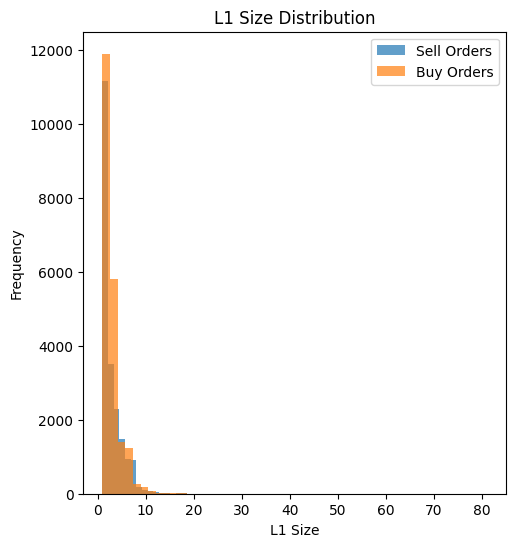

In [4]:
#plot L1 size available and hedge size for 
# if sell order matched level sign = -1 matched with bid level
import matplotlib.pyplot as plt
#check the sign of matched level interacted
df_sell = df[df['matched_lob_level_interacted'].apply(np.sign) == -1]
df_buy = df[df['matched_lob_level_interacted'].apply(np.sign) == 1]
#plot L1 size available and hedge size for sell orders
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_sell['L1-BidSize'], bins=50, alpha=0.7, label='Sell Orders')
plt.hist(df_buy['L1-AskSize'], bins=50, alpha=0.7, label='Buy Orders')
plt.title('L1 Size Distribution')
plt.xlabel('L1 Size')
plt.ylabel('Frequency')
plt.legend()


Distribution of Match Types:
match_type
exact    85.865216
fuzzy    14.134784
Name: proportion, dtype: float64


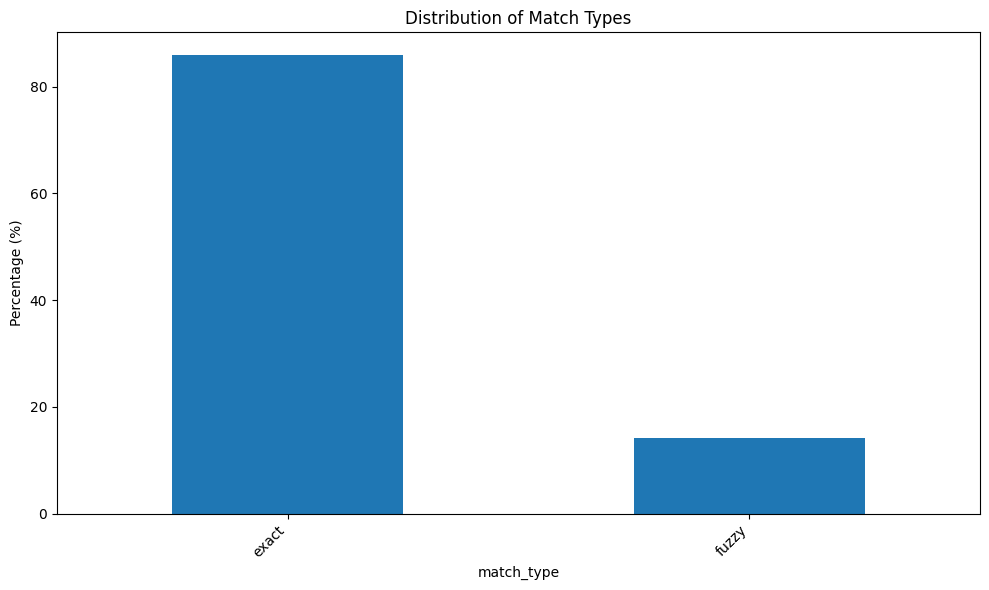


Distribution of LOB Level Interacted:
matched_lob_level_interacted
-10       11
-9        15
-8        24
-7        44
-6       100
-5       173
-4       435
-3       932
-2      2708
-1     16355
 1     16337
 2      2799
 3       976
 4       403
 5       193
 6        96
 7        71
 8        31
 9        17
 10       21
Name: count, dtype: int64


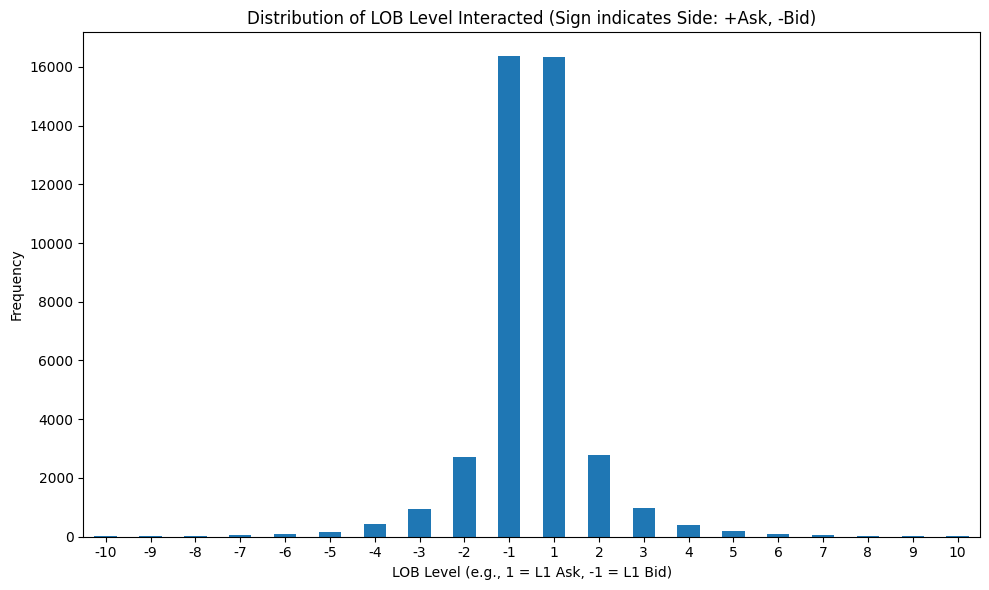


Distribution of Matched Hedge Fill Sizes:


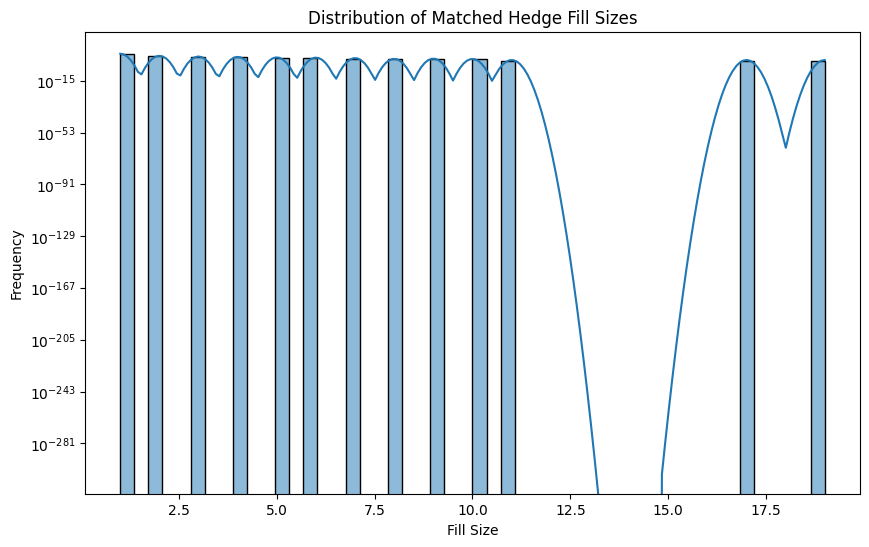

count    41741.000000
mean         1.081694
std          0.484830
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: matched_hedge_this_fill_size, dtype: float64


In [5]:
if not df.empty:
    # Distribution of Match Types
    print("\nDistribution of Match Types:")
    match_type_counts = df['match_type'].value_counts(normalize=True) * 100
    print(match_type_counts)
    plt.figure(figsize=(10, 6))
    match_type_counts.plot(kind='bar')
    plt.title('Distribution of Match Types')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Distribution of LOB Level Interacted
    print("\nDistribution of LOB Level Interacted:")
    lob_level_counts = df['matched_lob_level_interacted'].value_counts().sort_index()
    print(lob_level_counts)
    plt.figure(figsize=(10, 6))
    lob_level_counts.plot(kind='bar')
    plt.title('Distribution of LOB Level Interacted (Sign indicates Side: +Ask, -Bid)')
    plt.xlabel('LOB Level (e.g., 1 = L1 Ask, -1 = L1 Bid)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Distribution of Matched Hedge Fill Sizes
    print("\nDistribution of Matched Hedge Fill Sizes:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['matched_hedge_this_fill_size'], bins=50, kde=True)
    plt.title('Distribution of Matched Hedge Fill Sizes')
    plt.xlabel('Fill Size')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.show()
    print(df['matched_hedge_this_fill_size'].describe())


Descriptive Statistics for selected LOB features at time of match (MarketSpread, MidPrice, BBOImbalance, L1-AskSize, L1-BidSize):
       MarketSpread      MidPrice  BBOImbalance    L1-AskSize    L1-BidSize
count  41741.000000  41741.000000  41741.000000  41741.000000  41741.000000
mean       0.452271  17578.354840      0.008230      3.273760      3.151146
std        0.235719    497.111821      0.414399      3.191173      2.785175
min        0.250000  16384.750000     -0.981481      1.000000      1.000000
25%        0.250000  17286.875000     -0.333333      1.000000      1.000000
50%        0.500000  17683.000000      0.000000      2.000000      2.000000
75%        0.500000  17976.625000      0.333333      4.000000      4.000000
max        8.500000  18407.500000      0.988304    170.000000    107.000000


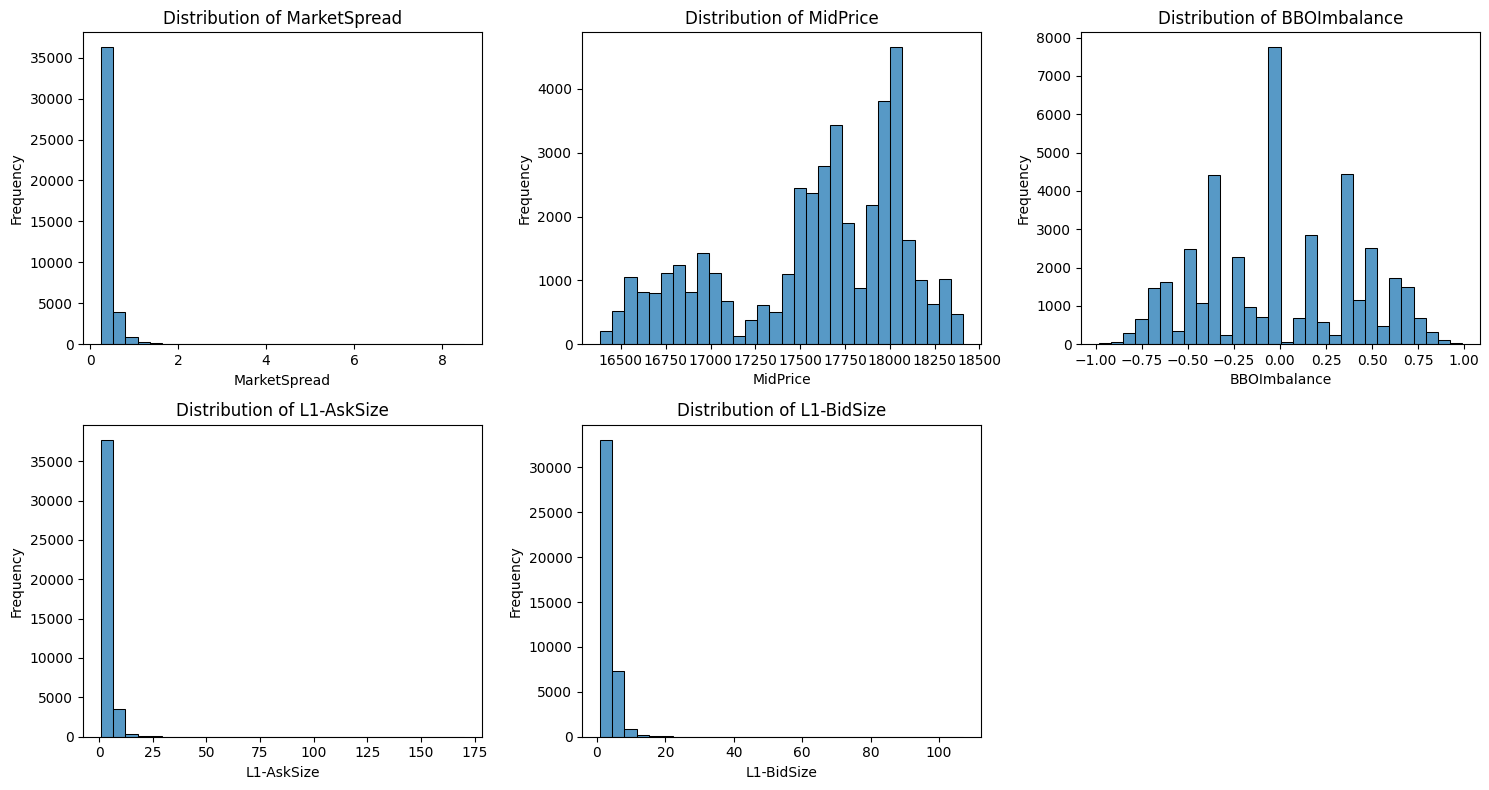

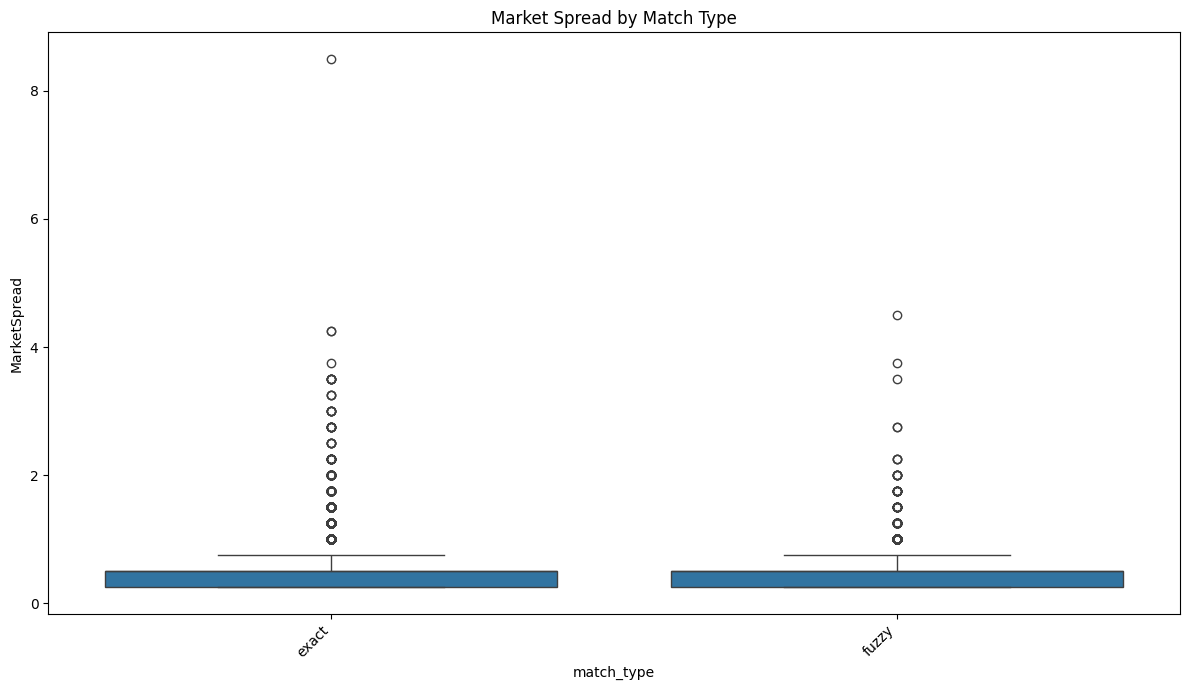

In [6]:
df['MarketSpread'] = df['L1-AskPrice'] - df['L1-BidPrice']
df['MidPrice'] = (df['L1-AskPrice'] + df['L1-BidPrice']) / 2
df['BBOImbalance'] = (df['L1-AskSize'] - df['L1-BidSize']) / (df['L1-AskSize'] + df['L1-BidSize'])


if not df.empty:
    lob_features_to_explore = ['MarketSpread', 'MidPrice', 'BBOImbalance', 
                               'L1-VolumeImbalance', 'L1-AskSize', 'L1-BidSize']

    existing_lob_features = [feat for feat in lob_features_to_explore if feat in df.columns]

    if existing_lob_features:
        print(f"\nDescriptive Statistics for selected LOB features at time of match ({', '.join(existing_lob_features)}):")
        print(df[existing_lob_features].describe())

        # Histograms for key LOB features
        num_features = len(existing_lob_features)
        cols = 3
        rows = (num_features + cols - 1) // cols # Calculate rows needed
        
        plt.figure(figsize=(15, rows * 4))
        for i, feature in enumerate(existing_lob_features):
            plt.subplot(rows, cols, i + 1)
            sns.histplot(df[feature].dropna(), bins=30, kde=False)
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Example: Boxplot of Spread by Match Type
        if 'MarketSpread' in df.columns and 'match_type' in df.columns:
            plt.figure(figsize=(12, 7))
            sns.boxplot(x='match_type', y='MarketSpread', data=df)
            plt.title('Market Spread by Match Type')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

